In [1]:
# pandas로 막대그래프... 합친
# plt로 그리면.. 나란히

In [ ]:
# 한글 처리
# 코렙 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

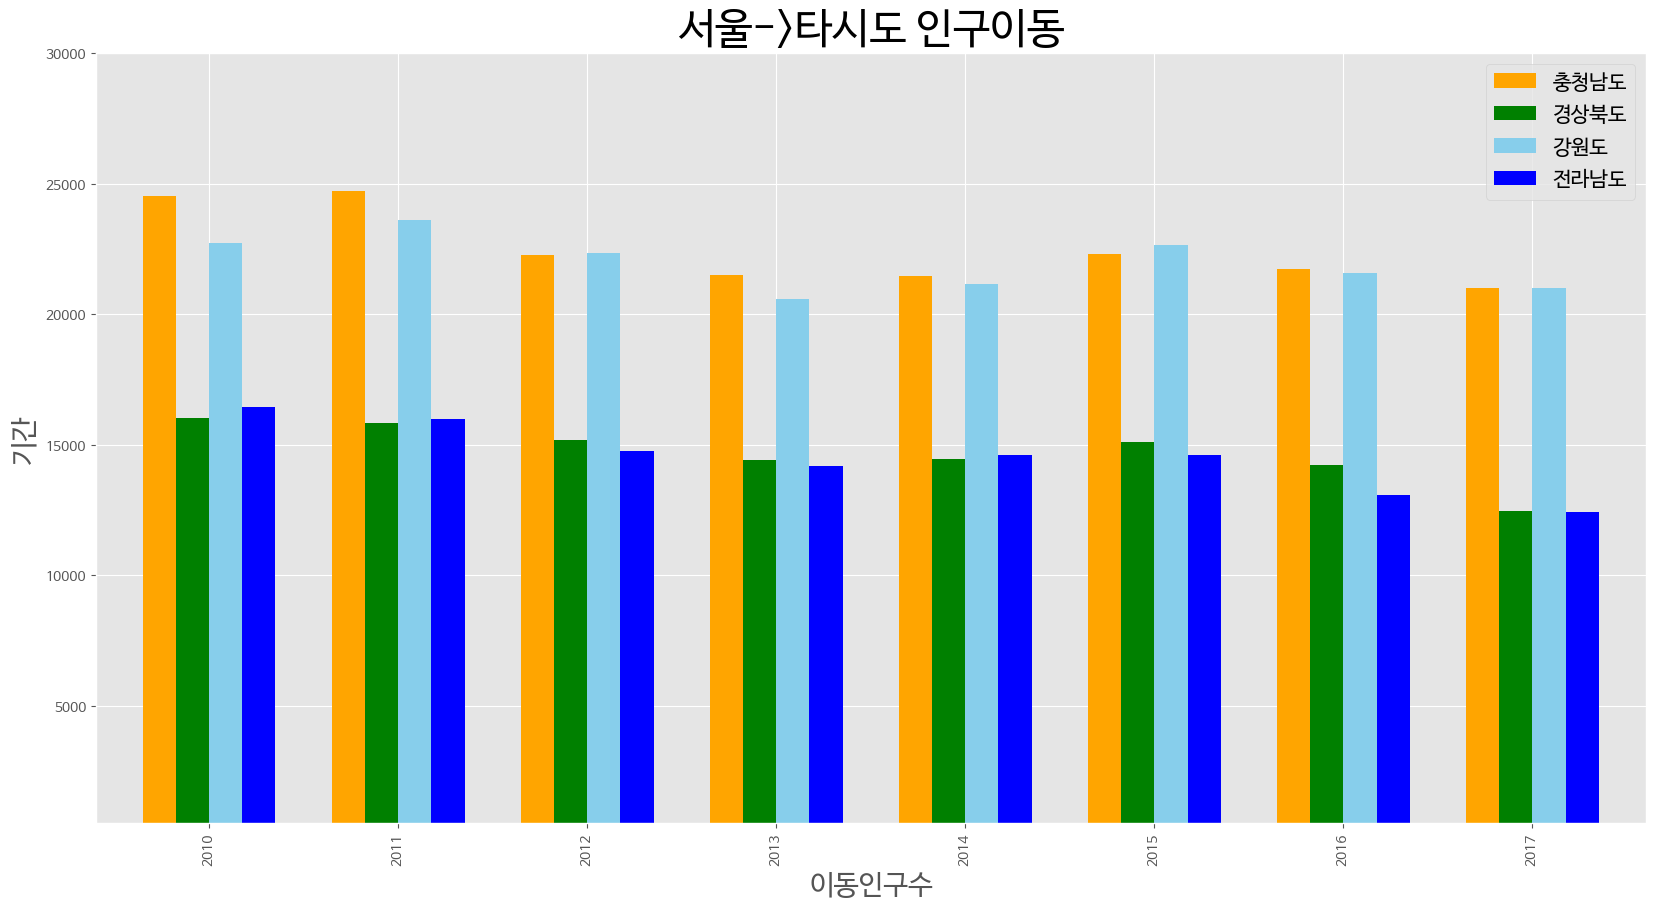

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

file_path = '/content/drive/MyDrive/Colab Notebooks/data/시각화/시도별 전출입 인구수.xlsx'
df = pd.read_excel(file_path)
df = df.fillna(method='ffill')
# 서울 -> 충청남도 경상북도 강원도 전라남도로 이동한 데이터값 선택
df_seoul = df[(df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.set_index(['전입지별'])

# 2010 ~ 2017
col_year = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도' ,'강원도' ,'전라남도'],col_year]
df_4 = df_4.T
#style
plt.style.use('ggplot')

# 막대 그래프 그리기
df_4.plot(kind='bar',figsize = (20,10), width=0.7, color=['orange','green','skyblue','blue'])
plt.title('서울->타시도 인구이동', size=30)
plt.xlabel("이동인구수",size=20)
plt.ylabel("기간",size=20)
plt.ylim(500,30000)
plt.legend(fontsize=15)
plt.show()

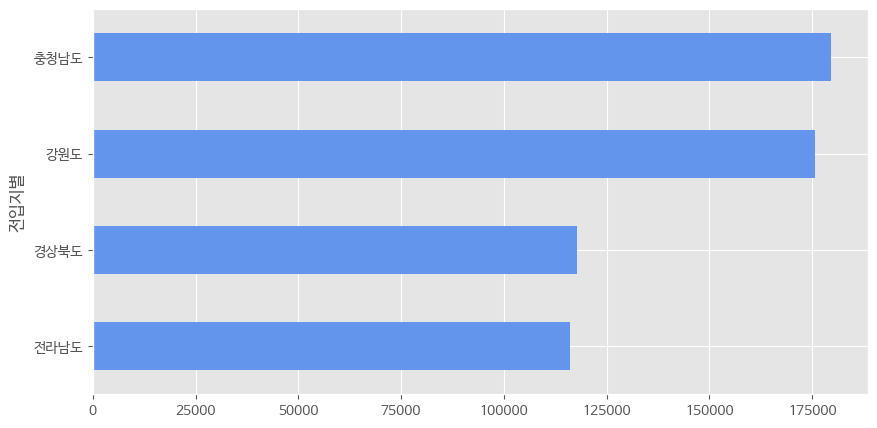

In [4]:
# 가로형 막대그래프는 각 변수 사이의 값의 차이를 설명하는데 적합
# 2010 ~ 2017 서울 각 시도로 이동한 인구의 합계를 구해서 시도별로 비교하는 그래프
df_4 = df_seoul.loc[['충청남도', '경상북도' ,'강원도' ,'전라남도'],col_year]
df_4['합계'] = df_4.sum(axis=1)
df_sorted = df_4['합계'].sort_values()
df_sorted.plot(kind='barh',color = 'cornflowerblue', width = 0.5, figsize=(10,5))
plt.show()


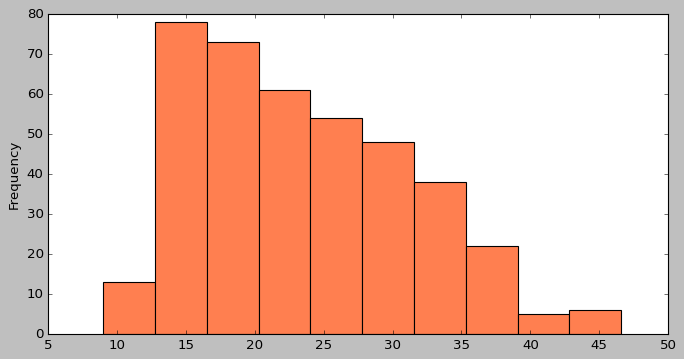

In [14]:
# 히스토 그램
file_path = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EC%8B%9C%EA%B0%81%ED%99%94/data/auto-mpg.csv'
plt.style.use('classic')
df = pd.read_csv(file_path,header=None)
df[0].plot(kind='hist',bins=10,color='coral', figsize = (10,5))
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


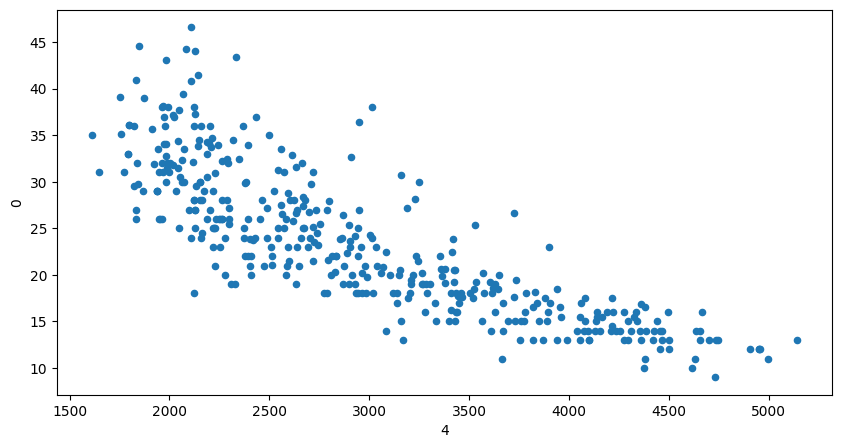

In [21]:
# 산점도 : 두 변수 사이의 데이터의 분포... 상관관계를 유추할 수 있음  
# kind = scatter  
# x축에 사용할 데이터, y축에 사용할 데이터
plt.style.use('default')
df.plot(kind='scatter', x=4, y = 0, figsize=(10,5))
plt.show()

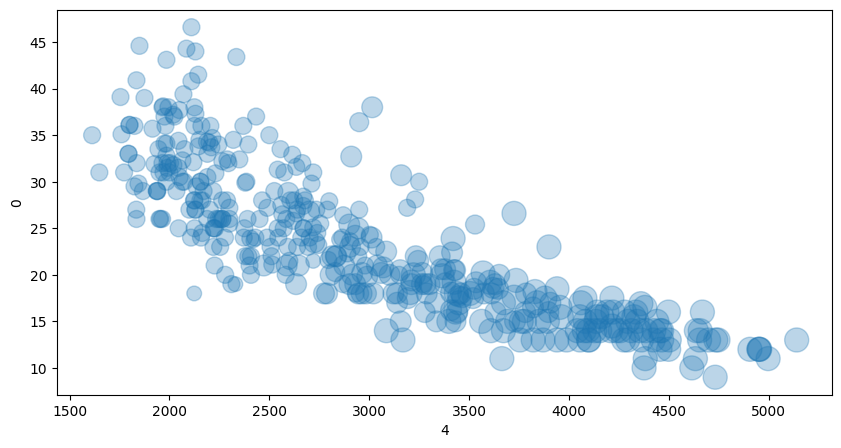

In [28]:
# 산점도 : 두 변수 사이의 데이터의 분포... 상관관계를 유추할 수 있음  
# kind = scatter  
# x축에 사용할 데이터, y축에 사용할 데이터
plt.style.use('default')
cylinder_size = (df[1] / df[1].max()) * 300
df.plot(kind='scatter', x=4, y = 0, alpha = 0.3,  s=cylinder_size,figsize=(10,5))
plt.show()

In [30]:
# pie chart
df.columns = ['mpg',
'cylinders',
'displacement',
'horsepower',
'weight',
'acceleration',
'model year',
'origin',
'car name']

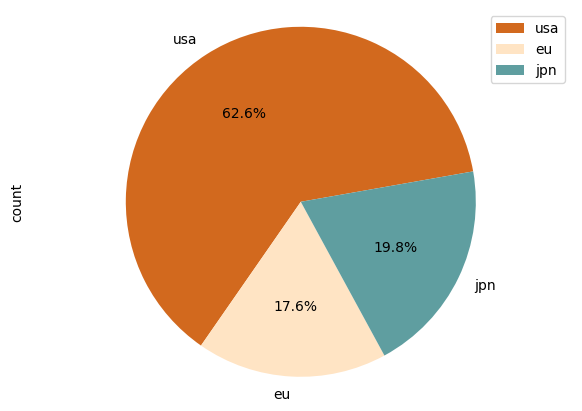

In [35]:
# 데이터 개수 카운트를 위해 값을 1을 가진 컬럼을 추가
df['count'] = 1
df_origin = df.groupby(['origin']).sum()
df_origin.index = ['usa','eu','jpn']
# 제조국가별 파이차트
df_origin['count'].plot(kind = 'pie',
                        figsize = (7,5),
                        autopct = '%1.1f%%', # 퍼센트 % 표시
                        startangle = 10,  #파이 조각을 나누는 시작점(각도 표시)
                        colors = ['chocolate','bisque','cadetblue']
                        )
plt.axis('equal') # 파이차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels = df_origin.index, loc = 'upper right')
plt.show()

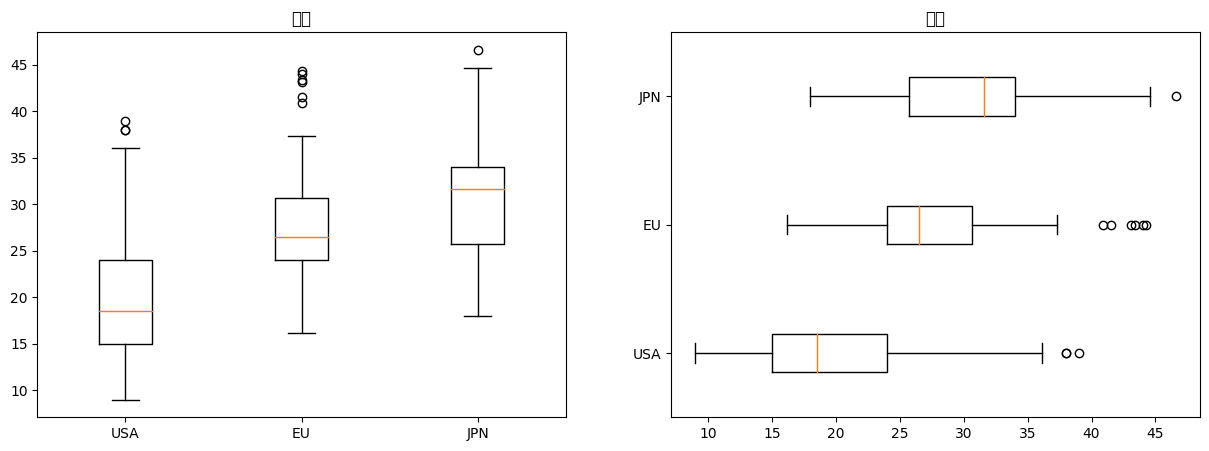

In [39]:
# box plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x = [ 
    df[df['origin'] == 1]['mpg'],
    df[df['origin'] == 2]['mpg'],
    df[df['origin'] == 3]['mpg']
], labels = ['USA','EU','JPN'])

ax2.boxplot(x = [ 
    df[df['origin'] == 1]['mpg'],
    df[df['origin'] == 2]['mpg'],
    df[df['origin'] == 3]['mpg']
], labels = ['USA','EU','JPN'], vert=False)
ax1.set_title('수직')
ax2.set_title('수평')
plt.show()